In [1]:
from pathlib import Path

import pdfstream.parsers as ps
import matplotlib.pyplot as plt
import pdfstream.modeling as md
import pdfstream.io as io
import pymongo

import numpy as np
import pandas as pd

# matplotlib settings
style_file = Path("/Users/sst/PycharmProjects/mpl-stylesheets/bg_style")
if style_file.is_file():
    plt.style.use(str(style_file))
del style_file

def readDF():
    """read metadata of analysis."""
    return pd.read_csv("data_info.csv", index_col=0)

DF = readDF()
client = pymongo.MongoClient()
db = client.tio2b
fits = db.fits
data = db.data

In [2]:
data0 = data.find_one({"meta_data.sample": "JBNP33L"})

In [3]:
def ligand(r, A, sigma, phi, wavelength):
    """A simulated PDF for ligands."""
    return A * np.exp(- r ** 2 / (2 * sigma ** 2)) * np.cos(2 * np.pi * r / wavelength + phi)

In [4]:
bronze = io.load_crystal("stru/TiO2_Bronze_mp.cif")
anatase = io.load_crystal("stru/TiO2_Anatase.cif")
data = io.load_parser(data0['gr_file'], meta={"qdamp":0.0313, "qbroad": 0.0131})

In [5]:
recipe0 = md.create(
    "JBNP33L",
    data,
    (1.6, 15.0, 0.01),
    "f0 * G0",
    {"f0": md.F.lognormalSphericalCF},
    {"G0": bronze}
)
md.initialize(recipe0)
md.set_values(
    recipe0,
    {"f0_psize": 40., "f0_psig": 10.}
)
md.bound_ranges(
    recipe0,
    {"f0_psize": (0.,), "f0_psig": (0.,)}
);

Start fit with all parameters fixed.
Free f0, G0_scale ...
`ftol` termination condition is satisfied.
Function evaluations 16, initial cost 5.0000e-01, final cost 1.7326e-01, first-order optimality 8.24e-05.
Free G0_lat ...
`ftol` termination condition is satisfied.
Function evaluations 48, initial cost 1.7326e-01, final cost 4.5695e-02, first-order optimality 1.75e-03.
Free G0_adp, G0_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 20, initial cost 4.5695e-02, final cost 3.7567e-02, first-order optimality 2.26e-04.
Free G0_xyz ...
`xtol` termination condition is satisfied.
Function evaluations 20, initial cost 3.7567e-02, final cost 1.5169e-02, first-order optimality 9.97e-03.


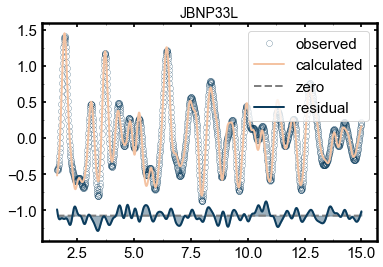

Start fit with all parameters fixed.
Free f0, G0_scale ...
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 2.2684e-02, final cost 2.1796e-02, first-order optimality 2.70e-05.
Free G0_lat ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 2.1796e-02, final cost 2.1114e-02, first-order optimality 9.47e-04.
Free G0_adp, G0_delta2 ...
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 14, initial cost 2.1114e-02, final cost 2.1032e-02, first-order optimality 1.59e-03.
Free G0_xyz ...
`xtol` termination condition is satisfied.
Function evaluations 11, initial cost 2.1032e-02, final cost 2.0684e-02, first-order optimality 2.79e-02.


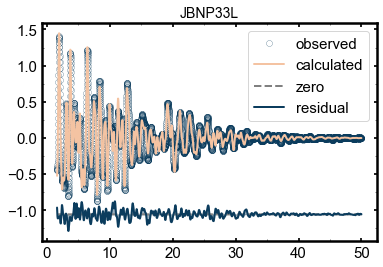

In [6]:
STEPS0 = [
    ("f0", "G0_scale"),
    "G0_lat",
    ("G0_adp", "G0_delta2"),
    "G0_xyz"
]
md.optimize(recipe0, STEPS0, verbose=1)
md.view_fits(recipe0)
md.set_range(recipe0, rmax=50.)
md.optimize(recipe0, STEPS0, verbose=1)
md.view_fits(recipe0)

In [8]:
recipe1 = md.create(
    "JBNP33L",
    data,
    (1.6, 15.0, 0.01),
    "f0 * G0 + f1 * G1",
    {"f0": md.F.lognormalSphericalCF, "f1": md.F.sphericalCF},
    {"G0": bronze, "G1": anatase}
)
md.initialize(recipe1)
md.set_values(recipe1, {"f1_psize": 60.})
md.bound_ranges(recipe1, {"f1_psize": (0.,)})
md.set_values(recipe1, md.get_value_dct(recipe0))
md.bound_ranges(recipe1, md.get_bound_dct(recipe0))

Start fit with all parameters fixed.
Free f0, G0_scale ...
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.5771e-02, final cost 1.5765e-02, first-order optimality 7.05e-07.
Free G0_lat ...
`xtol` termination condition is satisfied.
Function evaluations 12, initial cost 1.5765e-02, final cost 1.5524e-02, first-order optimality 1.21e-01.
Free G0_adp, G0_delta2 ...
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 10, initial cost 1.5524e-02, final cost 1.5346e-02, first-order optimality 2.72e-03.
Free G0_xyz ...
`xtol` termination condition is satisfied.
Function evaluations 11, initial cost 1.5346e-02, final cost 1.5074e-02, first-order optimality 2.61e-02.
Free f1, G1_scale ...
`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 1.5074e-02, final cost 8.4057e-03, first-order optimality 2.23e-03.
Free G1_lat ...
`ftol` termination condition is satisfied.
Function evaluations 14, initial cost 8

/Users/sst/anaconda3/envs/research/lib/python3.7/site-packages/diffpy/srfit/pdf/characteristicfunctions.py:181: RuntimeWarning: divide by zero encountered in true_divide
  - 0.75*r*erfc((-mu-2*s*s+log(r))/(sqrt2*s))*exp(-mu-2.5*s*s)


`ftol` termination condition is satisfied.
Function evaluations 64, initial cost 8.3215e-03, final cost 8.0360e-03, first-order optimality 1.91e-03.
Free G1_xyz ...
`ftol` termination condition is satisfied.
Function evaluations 13, initial cost 8.0360e-03, final cost 7.8264e-03, first-order optimality 1.88e-03.


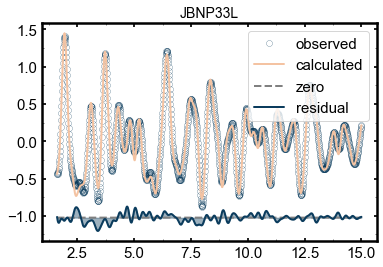

Start fit with all parameters fixed.
Free f0, G0_scale ...
`gtol` termination condition is satisfied.
Function evaluations 11, initial cost 1.3775e-02, final cost 1.1421e-02, first-order optimality 1.74e-06.
Free G0_lat ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 1.1421e-02, final cost 1.1231e-02, first-order optimality 3.49e-04.
Free G0_adp, G0_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 1.1231e-02, final cost 1.1088e-02, first-order optimality 1.66e-04.
Free G0_xyz ...
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 1.1088e-02, final cost 1.0570e-02, first-order optimality 2.92e-04.
Free f1, G1_scale ...
`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 1.0570e-02, final cost 9.2220e-03, first-order optimality 1.35e-03.
Free G1_lat ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 9.2220e-03, final cost

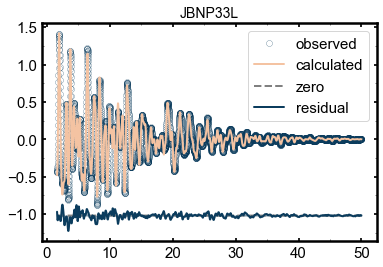

In [9]:
STEPS1 = [
    ("f1", "G1_scale"),
    "G1_lat",
    ("G1_adp", "G1_delta2"),
    "G1_xyz"
]
md.optimize(recipe1, STEPS0 + STEPS1, verbose=1)
md.view_fits(recipe1)
md.set_range(recipe1, rmax=50.)
md.optimize(recipe1, STEPS0 + STEPS1, verbose=1)
md.view_fits(recipe1)

In [25]:
recipe2 = md.create(
    "JBNP33L",
    data,
    (1.6, 15.0, 0.01),
    "f0 * G0 + f1 * G1 + f2",
    {"f0": md.F.lognormalSphericalCF, "f1": md.F.sphericalCF, "f2": ligand},
    {"G0": bronze, "G1": anatase}
)
md.initialize(recipe2)
md.set_values(
    recipe2,
    {
        "f2_A": 0.,
        "f2_sigma": 10,
        "f2_phi": np.pi,
        "f2_wavelength": 4.
    }
)
md.set_values(recipe2, md.get_value_dct(recipe1))
md.bound_ranges(
    recipe2,
    {
        "f2_A": (0.,),
        "f2_sigma": (0.,),
        "f2_phi": (0., 2 * np.pi),
        "f2_wavelength": (0., 10.)
    }
)
md.bound_ranges(recipe2, md.get_bound_dct(recipe1));

Start fit with all parameters fixed.
Free f0, G0_scale ...
`ftol` termination condition is satisfied.
Function evaluations 14, initial cost 8.1971e-03, final cost 8.1425e-03, first-order optimality 1.14e-04.
Free G0_lat ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 8.1425e-03, final cost 8.0765e-03, first-order optimality 6.57e-05.
Free G0_adp, G0_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 8.0765e-03, final cost 8.0339e-03, first-order optimality 6.59e-05.
Free G0_xyz ...
`xtol` termination condition is satisfied.
Function evaluations 13, initial cost 8.0339e-03, final cost 7.9539e-03, first-order optimality 3.19e-03.
Free f1, G1_scale ...
`ftol` termination condition is satisfied.
Function evaluations 21, initial cost 7.9539e-03, final cost 7.7242e-03, first-order optimality 4.37e-04.
Free G1_lat ...
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 8, initial cost 7.7

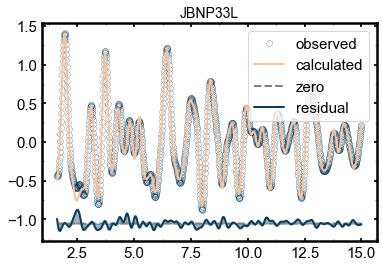

Start fit with all parameters fixed.
Free f0, G0_scale ...
`gtol` termination condition is satisfied.
Function evaluations 10, initial cost 1.0862e-02, final cost 8.9106e-03, first-order optimality 1.01e-06.
Free G0_lat ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 8.9106e-03, final cost 8.7588e-03, first-order optimality 2.02e-04.
Free G0_adp, G0_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 8.7588e-03, final cost 8.6767e-03, first-order optimality 1.56e-04.
Free G0_xyz ...
`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 8.6767e-03, final cost 8.2964e-03, first-order optimality 2.60e-03.
Free f1, G1_scale ...
`xtol` termination condition is satisfied.
Function evaluations 24, initial cost 8.2964e-03, final cost 6.8993e-03, first-order optimality 1.41e-03.
Free G1_lat ...
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 9, initial cost 6.8

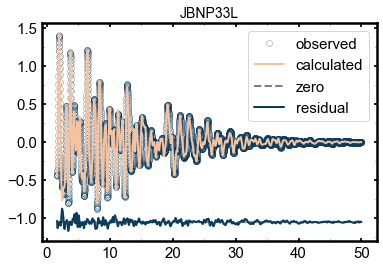

In [26]:
STEPS2 = [
    "f2"
]
md.optimize(recipe2, STEPS0 + STEPS1 + STEPS2, verbose=1)
md.view_fits(recipe2)
md.set_range(recipe2, rmax=50.)
md.optimize(recipe2, STEPS0 + STEPS1 + STEPS2, verbose=1)
md.view_fits(recipe2)

In [62]:
recipe3 = md.create(
    "JBNP33L",
    data,
    (1.6, 50.0, 0.01),
    "f0 * G0 + f1 * G1 + f2",
    {"f0": md.F.sphericalCF, "f1": md.F.shellCF, "f2": ligand},
    {"G0": bronze, "G1": anatase}
)
md.initialize(recipe3)
recipe3.constrain("f0_psize", "f1_radius")
md.set_values(
    recipe3,
    {"f1_radius": 45., "f1_thickness":45}
)
md.bound_ranges(
    recipe3,
    {"f1_radius": (0.,), "f1_thickness": (0.,)}
)
md.set_values(recipe3, md.get_value_dct(recipe2), ignore=True)
md.bound_ranges(recipe3, md.get_bound_dct(recipe2), ignore=True)

Start fit with all parameters fixed.
Free f0, f1, f2, scale ...
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 6.8843e-03, final cost 6.8843e-03, first-order optimality 9.03e-07.
Free lat ...
`ftol` termination condition is satisfied.
Function evaluations 2, initial cost 6.8843e-03, final cost 6.8843e-03, first-order optimality 1.19e-04.
Free adp, delta ...
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 6.8843e-03, final cost 6.8345e-03, first-order optimality 8.78e-05.
Free xyz ...
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 6.8345e-03, final cost 6.7532e-03, first-order optimality 7.23e-04.


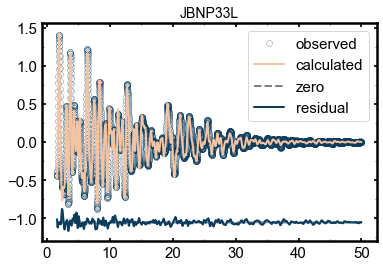

In [64]:
STEPS3 = [
    ("f0", "f1", "f2", "scale"),
    "lat",
    ("adp", "delta"),
    "xyz"
]
md.optimize(recipe3, STEPS3, verbose=1)
md.view_fits(recipe3)

In [71]:
recipe4 = md.create(
    "JBNP33L",
    data,
    (1.6, 50.0, 0.01),
    "f0 * G0",
    {"f0": md.F.sphericalCF},
    {"G0": bronze}
)
md.initialize(recipe4)
md.set_values(
    recipe4,
    md.get_value_dct(recipe0),
    ignore=True
)
md.set_values(
    recipe4,
    {"f0_psize": 50.}
)
md.bound_ranges(
    recipe4,
    {"f0_psize": (0.,)}
);

Start fit with all parameters fixed.
Free f0, G0_scale ...
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 3.6737e-02, final cost 3.5882e-02, first-order optimality 2.76e-06.
Free G0_lat ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 3.5882e-02, final cost 3.5287e-02, first-order optimality 4.86e-04.
Free G0_adp, G0_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 3.5287e-02, final cost 2.6095e-02, first-order optimality 4.35e-04.
Free G0_xyz ...
`xtol` termination condition is satisfied.
Function evaluations 14, initial cost 2.6095e-02, final cost 2.1162e-02, first-order optimality 1.46e-02.


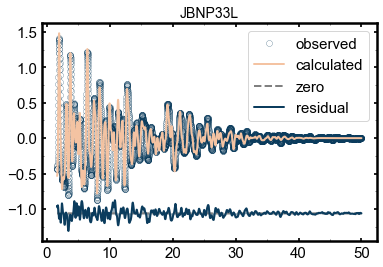

In [72]:
STEPS4 = [
    ("f0", "G0_scale"),
    "G0_lat",
    ("G0_adp", "G0_delta2"),
    "G0_xyz"
]
md.optimize(recipe4, STEPS4, verbose=1)
md.view_fits(recipe4)